### Import Packages



In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import plotly.express as px
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import sys, os

### Load Dataset



In [67]:
#Original scientific paper concluded that 'Age', ‘Family_diabetes’, ‘Physically active’, ‘Regular Medicine’ and ‘Pdiabetes’ were the most important factors and prove useful to predicting whether or not someone has diabetes. They used a ratio of 75:25.

In [131]:
diabetes = pd.read_csv("./diabetes_dataset__2019.csv")

In [0]:
diabetes.head()

In [0]:
diabetes.tail()

In [0]:
print(diabetes.columns)
print("")
print(diabetes.shape)

In [0]:
diabetes.info()

In [133]:
diabetes.dropna(inplace = True)

In [77]:

diabetes['Diabetic'] = diabetes['Diabetic'].replace('no', 0)
diabetes['Diabetic'] = diabetes['Diabetic'].replace(' no', 0)
diabetes['Diabetic'] = diabetes['Diabetic'].replace('yes', 1)
diabetes['Diabetic']

0      0
1      0
2      0
3      0
4      0
      ..
947    1
948    1
949    0
950    0
951    1
Name: Diabetic, Length: 905, dtype: int64

In [78]:
col_category = ['Gender']
for col in col_category:
    diabetes = pd.concat([diabetes.drop(col, axis=1), pd.get_dummies(diabetes[col], prefix=col, prefix_sep='_')], axis=1)

In [79]:
#Age Gender Diabetic
import plotly.express as px
df = diabetes
fig = px.violin(df, x="Gender_Female", y="Age",color="Diabetic", title=" Age and Gender of Diabetic Patients")

fig.show()
fig.write_html("Age_Gender_DiabeticPatitents.html")

In [71]:
df = diabetes
fig= px.bar(df, x= "PhysicallyActive", color="Age", barmode ='group',  title="Age Groups and Physical Activity")
fig.show()
fig.write_html("AgeGroups_PhysicalActivity.html")

In [141]:
#JunkFood, Age 
df= diabetes
fig = px.bar(df, x="JunkFood", y="Diabetic", barmode="group", color ="Age",
             title="Determining if Junkfood affects Diabetic People")
fig.show()
fig.write_html("JunkFood_AgeGroups.html")

### **Data Cleaning**



In [120]:
#cleaning the data -- dropping missing and duplicate values for sanity
diabetes.dropna(inplace = True)
diabetes = diabetes.reset_index(drop=True)

length = len(diabetes.index) #save length of array of later
length

905

In [121]:
#converting categorical variables into dummy variables
col_category = ['Age','Gender','Family_Diabetes','highBP','PhysicallyActive','Smoking','Alcohol','RegularMedicine',
                'JunkFood','Stress','BPLevel','Pdiabetes','UriationFreq']
for col in col_category:
    diabetes = pd.concat([diabetes.drop(col, axis=1), pd.get_dummies(diabetes[col], prefix=col, prefix_sep='_')], axis=1)

In [114]:
#coverting target variable (yes/no) into 0s and 1s
diabetes['Diabetic'] = diabetes['Diabetic'].replace('no', 0)
diabetes['Diabetic'] = diabetes['Diabetic'].replace(' no', 0)
diabetes['Diabetic'] = diabetes['Diabetic'].replace('yes', 1)
diabetes['Diabetic']

0      0
1      0
2      0
3      0
4      0
      ..
900    1
901    1
902    0
903    0
904    1
Name: Diabetic, Length: 905, dtype: int64

### Exploratory Data Analysis



In [88]:
#BMI, age, diabetic
df = diabetes
fig = px.bar(df, x="Diabetic", y="BMI", barmode="group", color = "Age_60 or older", title="BMI in Diabetics and Non-Diabetics relating to age group")
fig.show()

In [0]:
# Stress always and Quality Sleep
df = diabetes
fig = px.violin(df, x="Stress_always", y="SoundSleep", color= "Diabetic", title="Quality sleep in relation to stress")
fig.show()
fig.write_html('sleep_stress.html')

In [0]:
# Stress always and Quality Sleep
df = diabetes
fig = px.violin(df, x="Stress_not at all", y="SoundSleep", color= "Diabetic", title="Quality sleep in relation to stress")
fig.show()

In [165]:
# Blood Pressure and Alcohol

fig = px.pie(df, values='highBP', names='Alcohol')

fig.show()
fig.write_html("Alcohol and blood pressure")

In [91]:
# BMI and Gender
df= diabetes
fig = px.violin(df, x="Gender_Female", y="BMI", color="Gender_Female")

fig.update_layout(
    title="BMI of Each Gender",)

fig.show()
fig.write_html("BMI.html")

In [0]:
# BMI and Gender
df= diabetes
fig = px.violin(df, x="Gender", y="BMI", color="Gender")

fig.update_layout(
    title="BMI of Males",)

fig.show()
fig.write_html("BMI_gender.html")

In [0]:
df = diabetes
fig = px.bar(df, x="Diabetic", y="BMI", barmode='group', color = "Diabetic", height=400, title='BMI of diabetics compared to non-diabetics')
fig.show()

In [83]:
#BMI, age, diabetic
fig = px.bar(df, x="Stress", y="Age", color = "Age", 
             title="")
fig.show()
fig.write_html("Stress_age.html")

In [0]:
#BMI, age, diabetic
fig = px.bar(df, x="Stress_always", y="Gender_Female", barmode="group", color = "Age_60 or older", title="BMI in Diabetics and Non-Diabetics relating to age group")
fig.show()

In [0]:

fig = px.bar(df, x="Diabetic", y="Stress_always", barmode="group", color = "Age_60 or older", title="BMI in Diabetics and Non-Diabetics relating to age group")
fig.show()

In [168]:
fig = px.bar(df, x="Alcohol", y="Age", color = "Age", 
             title="")
fig.show()
fig.write_html("Alcohol_age.html")

In [157]:
#JunkFood, Age 
df= diabetes
fig = px.bar(df, x="Smoking", y="Age_less than 40", barmode="group", color ="Diabetic",
             title="Determining if Junkfood affects Diabetic People")
fig.show()
fig.write_html("JunkFood_age_less than 40.html")


ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI', 'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine', 'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes', 'UriationFreq', 'Diabetic'] but received: Age_less than 40

In [126]:
#Age and Physical Activity
fig = px.violin(df, x= "PhysicallyActive_one hr or more", y="Age_60 or older", color="Diabetic", title = 'Physical Activity Relating to Age in Diabetic and Non Diabetic People')
fig.show()

In [0]:
#Age and Physical Activity
fig = px.violin(df, x= "PhysicallyActive_none", y="Age_60 or older", color="Diabetic")
fig.show()

In [0]:
#Blood Pressure and Physical Activity in older people
fig = px.violin(df, x= "PhysicallyActive_less than half an hr", y="BPLevel_high", color="Age_60 or older",
               title='Physical Activity affect Blood Pressure in older people')
fig.show()

In [123]:
#Stress and smoking

df = diabetes 
fig = px.bar(df, x="Stress_always", y="Smoking_yes", barmode="group", color = "Diabetic", title="Does Smoking affect Stress levels?")
fig.show()
fig.write_html("Smoking.html")

In [0]:
#Family_diabetes Pdiabetes 
fig = px.bar(df, x= "Family_Diabetes_yes", y="Pdiabetes_yes", barmode = 'group', color="Diabetic")
fig.show()

In [0]:
#Family_diabetes Pdiabetes 
fig= px.violin(df, x= "RegularMedicine_yes", y="Age_60 or older", color="Diabetic")
fig.show()

In [0]:
df = diabetes
fig = px.bar(df, x="Stress_very often", y="SoundSleep", barmode="group", color = "SoundSleep", title=" Sleep Concived Affecting Stress")
fig.show()

### Model fitting



In [29]:
def conf_matrix(y, y_pred):
    fig, ax =plt.subplots(figsize=(3,3))
    labels=['No','Yes']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.title('Pass or fail')
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

def get_scores(y, y_pred, y_prob):
    data={'Accuracy': np.round(accuracy_score(y, y_pred),3),
    'Precision':np.round(precision_score(y, y_pred),3),
    'Recall':np.round(recall_score(y, y_pred),3),
    'F1':np.round(f1_score(y, y_pred),3),
    'ROC AUC':np.round(roc_auc_score(y, y_prob),3)}
    scores_df = pd.Series(data).to_frame('scores')
    return scores_df

In [30]:
X = diabetes["BMI"].to_numpy().reshape(-1, 1)
y = diabetes["Diabetic"].to_numpy().reshape(-1, 1)

In [31]:
#split data into training and testing
train, test = train_test_split(diabetes, test_size = 0.25, shuffle = True)

In [32]:
xcols = train.columns
x_train = train[xcols]
x_test = test[xcols]
y_train = train['Diabetic']
y_test = test['Diabetic']

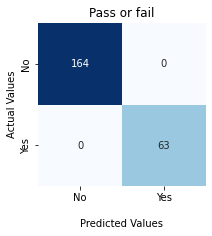

In [128]:
#SVMS
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

clf = svm.SVC(C= 0.1, gamma= 1, kernel= 'poly', probability= True)
clf.fit(x_train,y_train)
y_pred_clf = clf.predict(x_test)
y_prob_clf = clf.predict_proba(x_test)

conf_matrix(y_test, y_pred_clf)
get_scores(y_test, y_pred_clf, y_prob_clf[:, 1])

acc_svm = accuracy_score(y_test, y_pred_clf)
f1_svm = f1_score(y_test, y_pred_clf)

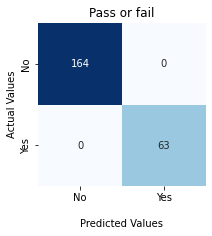

In [95]:
#SVM WITH STANDARD SCALER
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel': 'linear'
clf2 = Pipeline(steps = [("scaler", StandardScaler()), ('svm', SVC(kernel = 'linear', gamma='auto',  C = 0.1, probability = True))])
clf2.fit(x_train, y_train)
y_pred_clf2 = clf2.predict(x_test)
y_prob_clf2 = clf2.predict_proba(x_test)
conf_matrix(y_test, y_pred_clf2)
get_scores(y_test, y_pred_clf2, y_prob_clf2[:, 1])

acc_svm2 = accuracy_score(y_test, y_pred_clf2)
f1_svm2 = f1_score(y_test, y_pred_clf2)

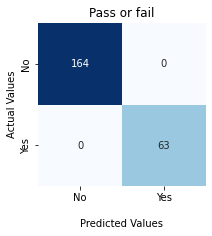

In [35]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 500, C = 1, penalty='l2')
reg.fit(x_train, y_train)
y_pred_reg = reg.predict(x_test)
y_prob_reg = reg.predict_proba(x_test)
conf_matrix(y_test, y_pred_reg)
get_scores(y_test, y_pred_reg, y_prob_reg[:, 1])

acc_reg = accuracy_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg)

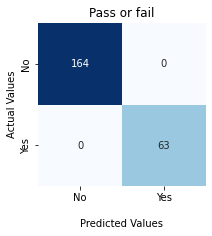

In [154]:
#RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier

# save selected model + tuned hyperparameters inside variable
rfc = RandomForestClassifier(bootstrap = True, criterion= 'gini', min_samples_split = 2,
                             min_samples_leaf = 1, max_depth= 5, max_features='sqrt', n_estimators=100)

# fit/train model using training datasets (x_train: features; y_train: target variable)
rfc.fit(x_train, y_train)

# predict result
y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)
conf_matrix(y_test, y_pred_rfc)
get_scores(y_test, y_pred_rfc, y_prob_rfc[:, 1])

acc_rfc = accuracy_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

In [0]:
# hyperparameter tuning

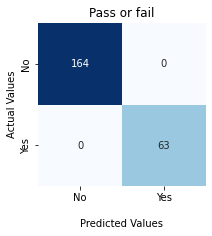

In [127]:
# term 1 RANDOM FOREST
conf_matrix(y_test, y_pred_rfc)
get_scores(y_test, y_pred_rfc, y_prob_rfc[:, 1])
acc_rfc = accuracy_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

acc_reg = accuracy_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg)

In [0]:
# term 2 LOGISTIC REGRESSION
conf_matrix(y_test, y_pred_reg) 
get_scores(y_test, y_pred_reg, y_prob_reg[:, 1])
acc_reg = accuracy_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg)

In [0]:
# random forest

# define parameter
grid_params_rfc = {'criterion' :['gini'],
                   'bootstrap': [True, False],
                   'max_depth': [4,5,6,7,8, None],
                   'max_features': ['sqrt'],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [5, 10, 50, 100]}

# call grid search function, specify which model you want to use + parameter
# save the whole thing into a variable
gs_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_params_rfc, cv= 5)


# fit/train the model
gs_rfc_res = gs_rfc.fit(x_train, y_train)


# print the calculated best parameters
print(gs_rfc_res.best_params_)

In [146]:
# logistic regression
# dictionary = {key:value}
# parameters = {parameter: []}
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn

grid_params_reg = {'penalty':['l2'],
                   'C':[1, 10, 100, 1000]}

gs_reg = GridSearchCV(estimator = LogisticRegression(max_iter=500),
                           param_grid = grid_params_reg,
                           cv = 5,
                           verbose=0)
gs_reg_res = gs_reg.fit(x_train, y_train)


print(gs_reg_res.best_params_)

{'C': 1, 'penalty': 'l2'}


In [0]:
# svm
# https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
# fitting the model for grid search


# define parameter
grid_params_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
              'kernel': ['rbf','poly','linear','sigmoid']}


# call grid search function, specify which model you want to use + parameter
# save the whole thing into a variable
gs_svm = GridSearchCV(estimator = svm.SVC(probability=True),
                      param_grid = grid_params_svm,
                      cv = 5,
                      verbose=0)


# fit the model
gs_svm_res = gs_svm.fit(x_train, y_train)
print(gs_svm_res.best_params_)

In [0]:
# svm with standard scaler
# https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/


pipeline =Pipeline(steps = [("scaler", StandardScaler()), ('svm', SVC(probability = True))])


print(pipeline)

grid_params_svm2 = {'svm__C': [0.1, 1, 10, 100, 1000],
              'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
              'svm__kernel': ['rbf','poly','linear','sigmoid']}

gs_svm2 = GridSearchCV(estimator = pipeline,
                           param_grid = grid_params_svm2,
                           cv = 5,
                           verbose=0)

gs_svm_res2 = gs_svm2.fit(x_train, y_train)
print(gs_svm_res2.best_params_)

graphs

In [40]:
# save accuracy and f1 score of each model into a list
accuracy = [acc_reg, acc_rfc, acc_svm, acc_svm2]
f1 = [f1_reg, f1_rfc, f1_svm, f1_svm2]
model = ['logistic regression', 'random forest', 'svm', 'svm with standard scalar']


# plot accuracy
fig = px.line(x = model, y = accuracy, title = 'The Accuracy Score of Each Model')
fig.update_xaxes(title_text = "Models")
fig.update_yaxes(range = [0,1.1], title_text = "Accuracy")
fig.show()
fig.write_html("Accuracy_scores.html")


# plot f1 score
fig = px.line(x = model, y = f1, title = 'The F1 Score of Each Model')
fig.update_xaxes(title_text = "Models")
fig.update_yaxes(range = [0,1.1], title_text = "F1 Scores")
fig.show()
fig.write_html("Accuracy_and_F1_scores.html")

In [0]:
# save accuracy and f1 score of each model into a list
accuracy = [acc_reg, acc_rfc, acc_svm, acc_svm2]
f1 = [f1_reg, f1_rfc, f1_svm, f1_svm2]
model = ['logistic regression', 'random forest', 'svm', 'svm with standard scalar']


# plot accuracy
fig = px.bar(x = model, y = accuracy, title = 'The Accuracy Score of Each Model')
fig.update_xaxes(title_text = "Models")
fig.update_yaxes(title_text = "Accuracy")
fig.show()
# fig.write_html("Accuracy and f1 scores")


# plot f1 score
fig = px.bar(x = model, y = f1, title = 'The F1 Score of Each Model')
fig.update_xaxes(title_text = "Models")
fig.update_yaxes(title_text = "F1 Scores")
fig.show()
# fig.write_html("Accuracy and f1 scores")

In [0]:
# save accuracy and f1 score of each model into a list
accuracy = [acc_reg, acc_rfc, acc_svm, acc_svm2]
f1 = [f1_reg, f1_rfc, f1_svm, f1_svm2]
model = ['logistic regression', 'random forest', 'svm', 'svm with standard scalar']


# plot accuracy
fig = px.scatter(x = model, y = accuracy, title = 'The Accuracy Score of Each Model')
fig.update_xaxes(title_text = "Models")
fig.update_yaxes(range = [0,1.1], title_text = "Accuracy")
fig.show()
# fig.write_html("Accuracy and f1 scores")


# plot f1 score
fig = px.scatter(x = model, y = f1, title = 'The F1 Score of Each Model')
fig.update_xaxes(title_text = "Models")
fig.update_yaxes(range = [0,1.1], title_text = "F1 Scores")
fig.show()
# fig.write_html("Accuracy and f1 scores")
fig.write_html("Accuracy and f1 scores")